In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [393]:
data = df.copy()
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Problem Statement

**OBJECTIVE:** Predict the species (Adelie, Chinstrap, Gentoo) of a penguin using a KNN classifier.

**Features:**

**01. Numeric:** culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g.

**02. Categorical:** island (Torgersen, Biscoe, Dream), sex (MALE, FEMALE, NA).

**Target:** species (multi-class classification: Adelie, Chinstrap, Gentoo).

### Exploratory Data Analysis

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Attributes and Data Types
**01. Species (Target):**

**Type:** Discrete (Nominal)

**Description:** Categorical with three distinct classes (Adelie, Chinstrap, Gentoo); no inherent order.

**02. Island:**

**Type:** Discrete (Nominal)

**Description:** Categorical with three values (Torgersen, Biscoe, Dream); no order among them.

**03. Culmen_length_mm:**

**Type:** Continuous

**Description:** Numerical measurement of bill length in millimeters; can take any value within a range.

**04. Culmen_depth_mm:**

**Type:** Continuous

**Description:** Numerical measurement of bill depth in millimeters; continuous range of values.

**05. Flipper_length_mm:**

**Type:** Continuous

**Description:** Numerical measurement of flipper length in millimeters; continuous variable.

**06. Body_mass_g:**

**Type:** Continuous

**Description:** Numerical measurement of body mass in grams; continuous with a wide range.

**07. Sex:**

**Type:** Discrete (Nominal)

**Description:** Categorical with two values (MALE, FEMALE) after filtering; no ordinal relationship.

In [397]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [399]:
data.describe(include='O')

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


In [ ]:
* Now let us find the null values 

In [401]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [403]:
(data.isnull().sum()/len(data)) * 100

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

- As the null values is very less in percentage, so we can drop them

In [405]:
data = data.dropna()

In [407]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [409]:
(data.isnull().sum()/len(data)) * 100

species              0.0
island               0.0
culmen_length_mm     0.0
culmen_depth_mm      0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

##### Now we got a dataset free of NULL values, but also let's check for the duplicates, if there are no duplicates then we can proceed further

In [411]:
data.duplicated().sum()

0

In [413]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [415]:
data.describe(include=['O'])

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


In [417]:
data['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [419]:
data['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [421]:
data.drop(data[data['sex'] == '.'].index, inplace=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_12832\2605011846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['sex'] == '.'].index, inplace=True)


In [423]:
data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [425]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [427]:
data['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [429]:
continuous_cols = data.select_dtypes(include='number').columns
continuous_cols

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [431]:
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['species', 'island', 'sex'], dtype='object')

In [433]:
data.shape

(333, 7)

### Univariate Analysis

In [375]:
def cont_vis_analysis(data,col):
    fig,axes = plt.subplots(1,3,figsize=(10,4), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions')

    axes[0].set_title('Histogram')
    sns.histplot(data[col],ax=axes[0])

    axes[1].set_title('KDE Plot')
    sns.kdeplot(data[col],ax=axes[1])

    axes[2].set_title('Box Plot')
    sns.boxplot(data[col],ax=axes[2])

    fig.show()

    # Non-Visual Analysis of continuous variables

def cont_non_visual_analysis(data,col):
    series = data[col]
    print('Non-Visual Analysis')
    print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']))
    print('-'*20)

Non-Visual Analysis
count     333.000000
min        32.100000
max        59.600000
mean       43.992793
median     44.500000
var        29.906333
std         5.468668
skew        0.045340
kurt       -0.883418
Name: culmen_length_mm, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


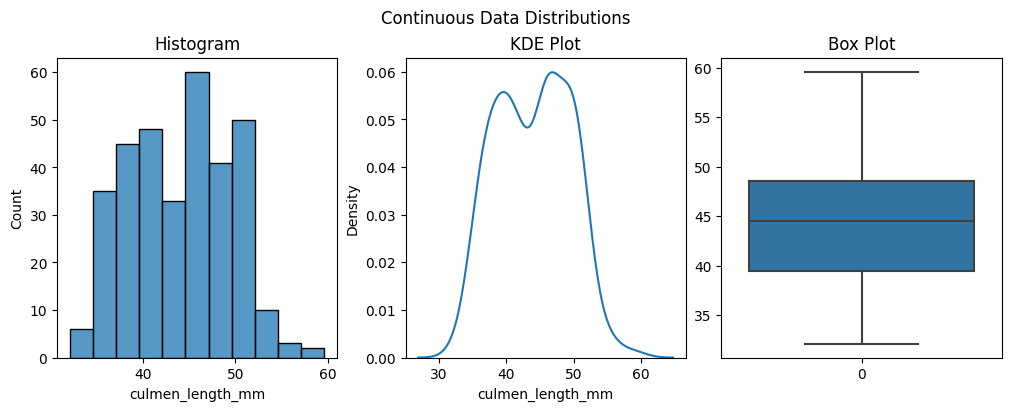

In [401]:
cont_non_visual_analysis(data,'culmen_length_mm')
cont_vis_analysis(data,'culmen_length_mm')

**Uni Variate Analysis - Culmen_Length_mm**
- As we can see the above visual plotted for Culmen_Length_mm, this column is free of outliers
- And if we can see the tail of kde plot, it is extended a bit long to it's right side but it is not too much, so the data is right skewed.
- And also it is a platykurtic, as the central part of the distribution is less peaked and lighter tails

Non-Visual Analysis
count     333.000000
min        13.100000
max        21.500000
mean       17.164865
median     17.300000
var         3.877888
std         1.969235
skew       -0.149720
kurt       -0.891960
Name: culmen_depth_mm, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


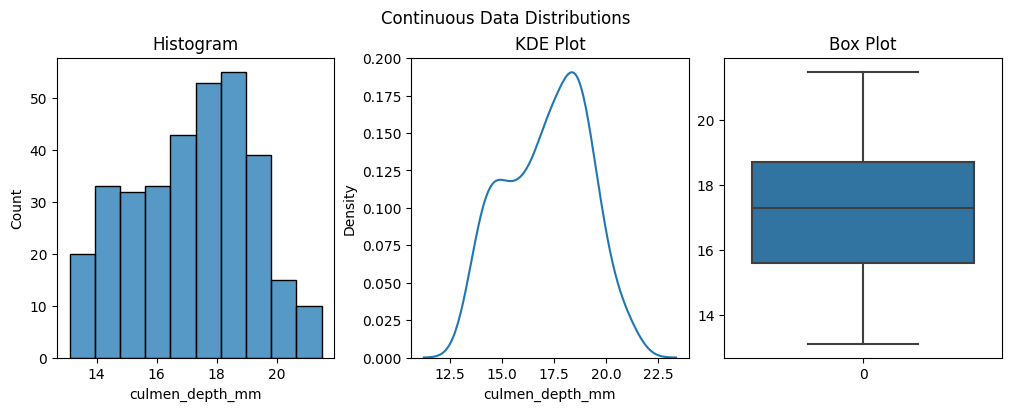

In [403]:
cont_non_visual_analysis(data,'culmen_depth_mm')
cont_vis_analysis(data,'culmen_depth_mm')


**Uni Variate Analysis - Culmen_Depth_mm**
- The data distribution is more between 16 and 20 in Culmen_Depth_mm column
- Kurtosis and Skewness both are in negative values, so the data is less peaked in it's central part and it is left skewed
- And also there are no outliers in this column 

Non-Visual Analysis
count     333.000000
min       172.000000
max       231.000000
mean      200.966967
median    197.000000
var       196.441677
std        14.015765
skew        0.360148
kurt       -0.961241
Name: flipper_length_mm, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


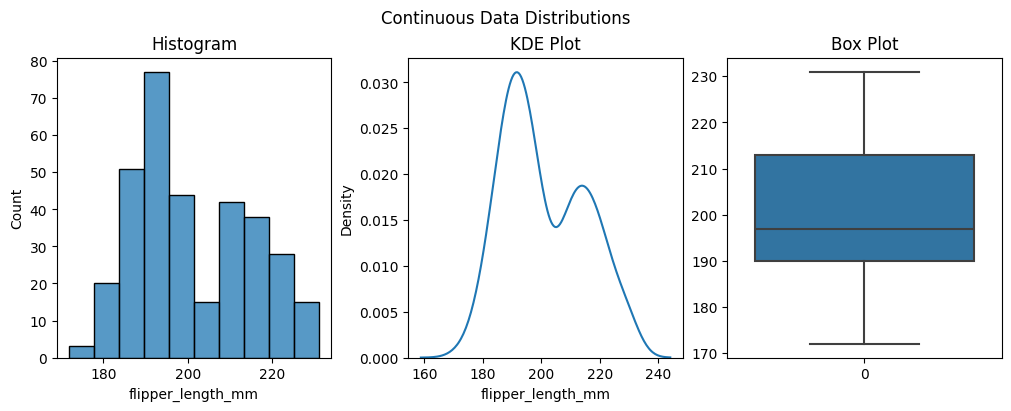

In [405]:
cont_non_visual_analysis(data,'flipper_length_mm')
cont_vis_analysis(data,'flipper_length_mm')


**Uni Variate Analysis - Flipper_Lengthh_mm**
- Here in the histogram if you can see it, the data is bulked in the range between like 190 and 200
- The data is right skewed which means that the majority of the data points are concentrated on the left side of the curve. However, the tail of the distribution stretches out to the right, toward the larger values.
- And there are no outliers in this feature

Non-Visual Analysis
count        333.000000
min         2700.000000
max         6300.000000
mean        4207.057057
median      4050.000000
var       648372.487699
std          805.215802
skew           0.472246
kurt          -0.733489
Name: body_mass_g, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


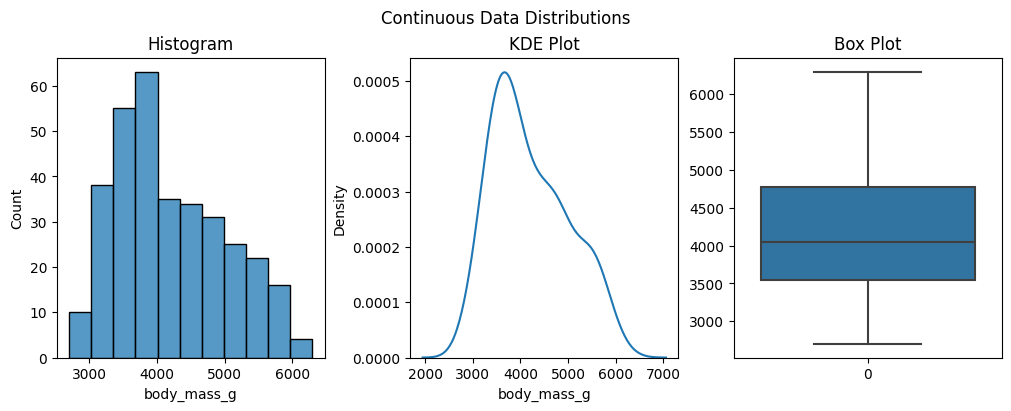

In [407]:
cont_non_visual_analysis(data,'body_mass_g')
cont_vis_analysis(data,'body_mass_g')

**Uni Variate Analysis - Body_Mass_g**
- In this distribution of Body_Mass_g there is a peak in between 3500 and 5000 body mass
- And this distribution is a right skewed distribution in which the smaller amount of data points with high values (or a higher range of values) are concentrated on the right side of the curve. This forms the characteristic long tail on the right side of the distribution.
- And there are no outliers in the column

In [377]:
def cat_vis_analysis(data,col):

    print('Value counts for column: ',col)
    print(data[col].value_counts())
    print('Null values in: ')
    print(data[col].isnull().sum())
    
    fig,axes = plt.subplots(1,2,figsize=(6,3),layout='constrained')
    plt.suptitle('Categorical Data Distributions')

    axes[0].set_title('Bar Chart')
    sns.countplot(x=col,data=data,ax = axes[0])
    
    axes[1].set_title('Pie Chart')
    vc_data = data[col].value_counts()
    axes[1].pie(vc_data, labels = vc_data, autopct = '%1.1f%%')

    fig.show()

In [411]:
data.select_dtypes(include='object').columns

Index(['species', 'island', 'sex'], dtype='object')

Value counts for column:  species
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\1340979647.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


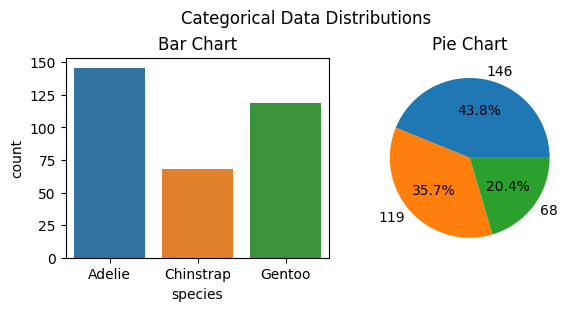

In [413]:
cat_vis_analysis(data,'species')

**Uni Variate Analysis - species**
- It is a categorical data and tells how the data is distributed among all the categories present out there
- Here we are plotted two visuals, pie chart and bar chart.
- **Bar chart** - Count of data points distributed and **Pie Chart** - Proportion of the data points distributed
- And here we can see there is no domination of one category also at the same time the data is not distributed equally among each category.
- But still it adds value, as every category is having some amount of data

Value counts for column:  island
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\1340979647.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


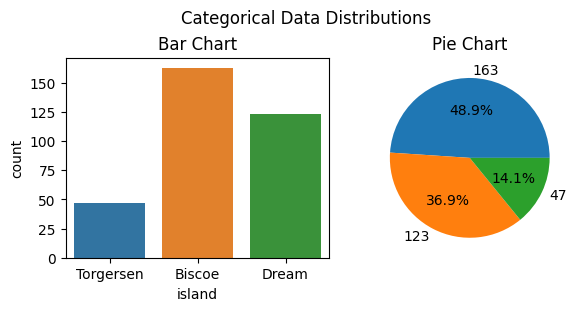

In [415]:
cat_vis_analysis(data,'island')

- Here there is a bit of domination of only one category that is **Biscoe Island** as it distributed with almost 50% of data

Value counts for column:  sex
sex
MALE      168
FEMALE    165
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_18556\1340979647.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


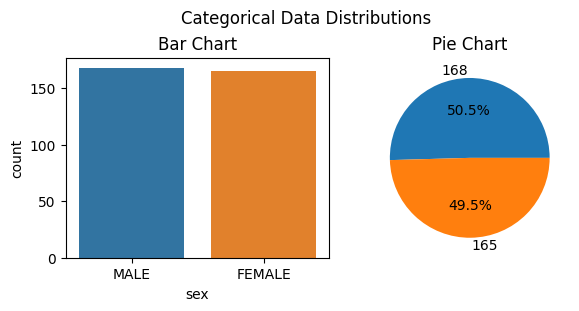

In [417]:
cat_vis_analysis(data,'sex')

- The data is mostly equally distributed among two categories

### Bi-Variate Analysis

In [379]:
def cont_cont_bivar_analysis(data,col1,col2):
    print(f'Covariance : {data[col1].cov(data[col2])}')
    print(f'Correlation : {data[col1].corr(data[col2])}')
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=col1,y=col2,data=data)
    plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

In [381]:
data.select_dtypes(include='number').columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

### Continuous vs. Continuous Analysis

Covariance : -2.4620913383262786
Correlation : -0.22862563591302906


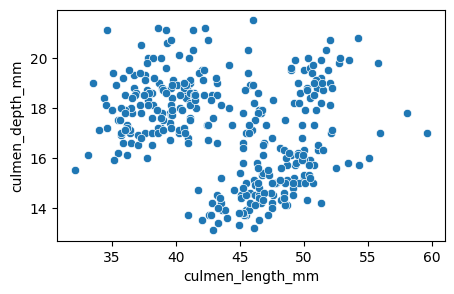

In [423]:
cont_cont_bivar_analysis(data,'culmen_length_mm','culmen_depth_mm')

- The given covariance and correlation values suggest a weak negative relationship between **culmen length** and **culmen depth** in the dataset.
- While the covariance indicates the direction (negative), the correlation quantifies the strength, showing that as culmen length increases, culmen depth tends to slightly decrease, but the relationship is not strong.

Covariance : 2595.623304026919
Correlation : 0.5894511101769492


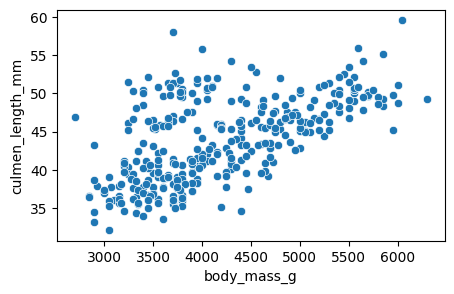

In [425]:
cont_cont_bivar_analysis(data,'body_mass_g','culmen_length_mm')

- These results indicate a moderate positive relationship between body mass and culmen length. The positive covariance shows that as one variable increases, the other tends to increase as well, while the correlation value of 0.59 suggests a moderate strength in this linear relationship.
- In simpler terms, larger body mass is somewhat associated with longer culmen length, but the relationship is not perfectly strong.

Covariance : 9852.191649480807
Correlation : 0.8729788985653614


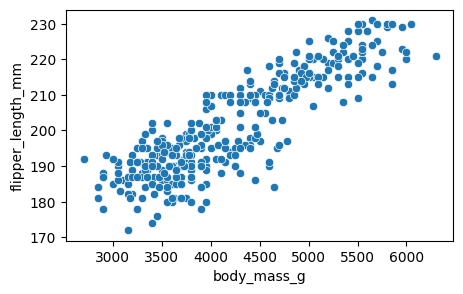

In [427]:
cont_cont_bivar_analysis(data,'body_mass_g','flipper_length_mm')

- These results highlight a strong positive relationship between body mass and flipper length.
- The high positive covariance indicates that as body mass increases, flipper length tends to increase significantly as well.
- Additionally, the correlation value of 0.87 shows a strong linear association between these two variables.

### Categorical vs. Continuous Data Analysis

In [429]:
data.select_dtypes(include='object').columns

Index(['species', 'island', 'sex'], dtype='object')

Average body mass for each species:
species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64
----------------------------------------


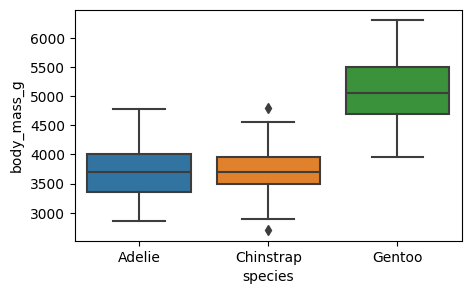

In [431]:
# avg sepal length for every species
avg_body_mass_g = data.groupby('species')['body_mass_g'].mean()
print('Average body mass for each species:')
print(avg_body_mass_g)
print('-'*40)
cont_cat_bivar_analysis(data,'species','body_mass_g')

- The provided boxplot visualizes the relationship between a continuous variable (body mass in grams) and a categorical variable (Penguin species).
- As this is a bivariate analysis, specifically used to compare the distribution of body_mass_g variable across different species of penguin categories.
- The species named as "Gentoo" is having higher body mass compared to rest of the species.
- The median weight of "Adelie" and "Chinstrap" species is almost same i.e., approximately 3750.

Average body mass for each species:
species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64
----------------------------------------


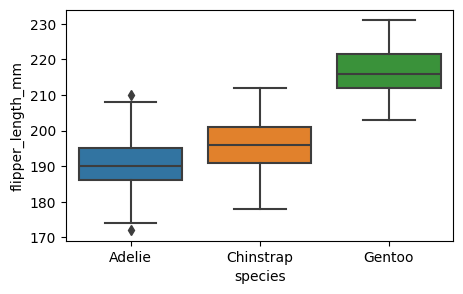

In [81]:
avg_body_mass_g = data.groupby('species')['flipper_length_mm'].mean()
print('Average body mass for each species:')
print(avg_body_mass_g)
print('-'*40)
cont_cat_bivar_analysis(data,'species','flipper_length_mm')

- The box plot visualizes the distribution of flipper lengths for different species: Adelie, Chinstrap, and Gentoo.
- The Gentoo penguins tend to have the longest flippers, followed by Chinstrap, and then Adelie penguins having shortest.
- The longer the box or whiskers, the more variability in flipper length within that species.
- The line inside each box represents the median flipper length for that species.

Average body mass for each species:
species
Adelie       18.347260
Chinstrap    18.420588
Gentoo       14.996639
Name: culmen_depth_mm, dtype: float64
----------------------------------------


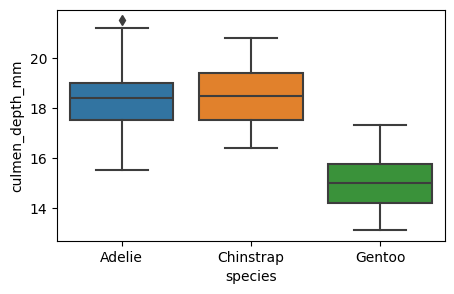

In [433]:
avg_body_mass_g = data.groupby('species')['culmen_depth_mm'].mean()
print('Average body mass for each species:')
print(avg_body_mass_g)
print('-'*40)
cont_cat_bivar_analysis(data,'species','culmen_depth_mm')

- The box plot visualizes te culmen depth (in mm) for three penguin species.
- The plot indicates that "Gento" penguins tend to have a shallower culmen depth compared to "Adelie" and "Chinstrap" penguins.
- "Adelie" and "Chinstrap" penguins have similar culmen depth distributions.

Average body mass for each species:
species
Adelie       38.823973
Chinstrap    48.833824
Gentoo       47.568067
Name: culmen_length_mm, dtype: float64
----------------------------------------


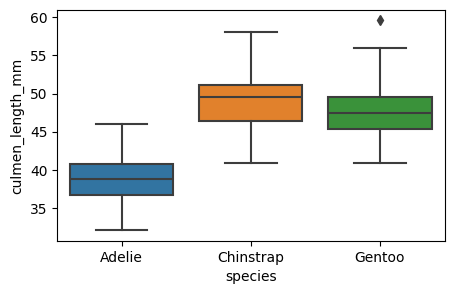

In [87]:
avg_body_mass_g = data.groupby('species')['culmen_length_mm'].mean()
print('Average body mass for each species:')
print(avg_body_mass_g)
print('-'*40)
cont_cat_bivar_analysis(data,'species','culmen_length_mm')

- The boxplot visualizes the distribution of culmen length in millimeters for three species.
- The box with orenage color represents the "Chinstrap" species, which shows that this species tend to have the longest beaks (culmen), followed by "Gentoo" and then "Adelie" penguins with the shortest.
- The "Chinstrap" penguin's box is wider than the others, suggesting more variation in their culmen length compared to "Adelie" and "Gentoo".
- And the whiskers extending from the box show the range of data.

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='culmen_length_mm', ylabel='Density'>

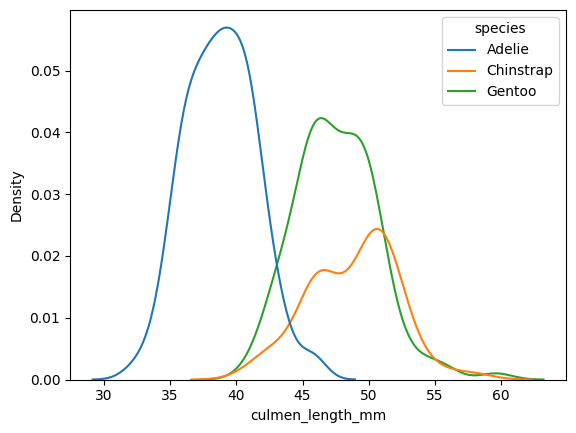

In [435]:
sns.kdeplot(x='culmen_length_mm',data=data,hue='species')

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

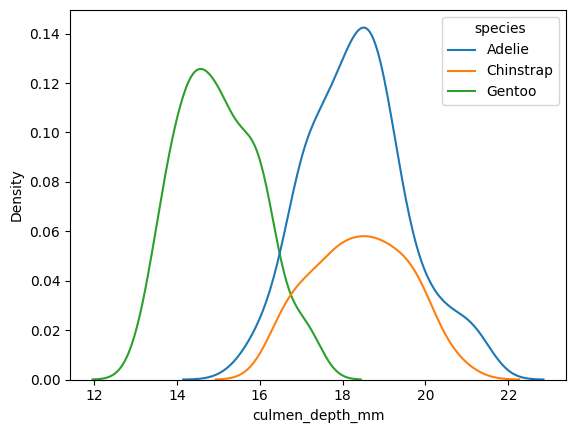

In [91]:
sns.kdeplot(x='culmen_depth_mm',data=data,hue='species')

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

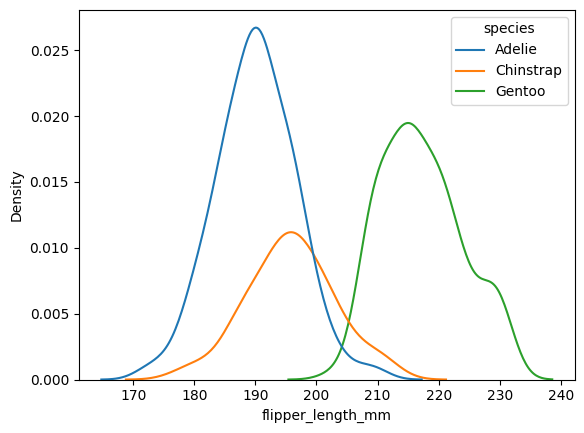

In [93]:
sns.kdeplot(x='flipper_length_mm',data=data,hue='species')

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='body_mass_g', ylabel='Density'>

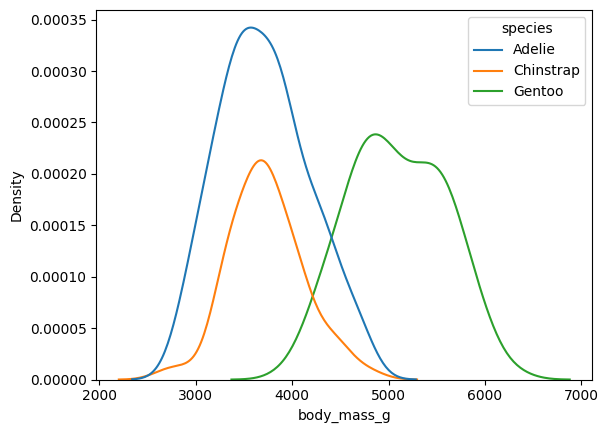

In [95]:
sns.kdeplot(x='body_mass_g',data=data,hue='species')

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

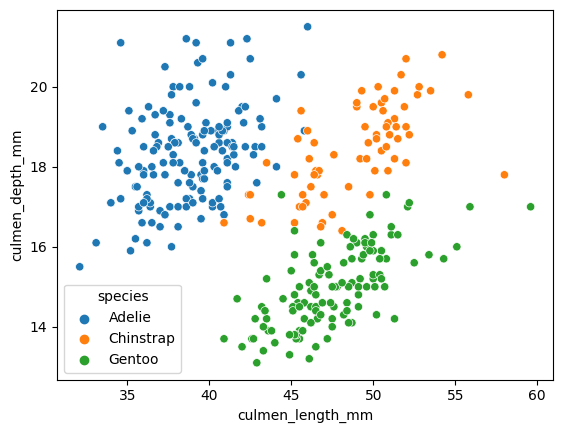

In [247]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=data,hue='species')

## Data Preprocessing

In [439]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [441]:
Data = data.copy()
Data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [443]:
# Encode 'species' (target) with Label Encoding
Data['species'] = Data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Encode 'island' with One-Hot Encoding (drop one column)
Data = pd.get_dummies(Data, columns=['island'], drop_first=False)

# Encode 'sex' with One-Hot Encoding (keep both columns)
Data = pd.get_dummies(Data, columns=['sex'], drop_first=False)

In [447]:
Data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,0,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,0,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,0,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,0,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [449]:
# Initialize and fit scaler on training data
scaler = StandardScaler()
# Define numerical columns
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initialize and fit scaler on training data
Data[numerical_cols] = scaler.fit_transform(Data[numerical_cols])

In [451]:
Data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,-0.896042,0.780732,-1.426752,-0.568475,False,False,True,False,True
1,0,-0.822788,0.119584,-1.069474,-0.506286,False,False,True,True,False
2,0,-0.676280,0.424729,-0.426373,-1.190361,False,False,True,True,False
4,0,-1.335566,1.085877,-0.569284,-0.941606,False,False,True,True,False
5,0,-0.859415,1.747026,-0.783651,-0.692852,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
338,2,0.587352,-1.762145,0.931283,0.892957,True,False,False,True,False
340,2,0.514098,-1.457000,1.002739,0.799674,True,False,False,True,False
341,2,1.173384,-0.744994,1.502928,1.919069,True,False,False,False,True
342,2,0.221082,-1.202712,0.788372,1.234995,True,False,False,True,False


In [455]:
x = Data.drop('species',axis=1)
y = Data['species']
x.shape, y.shape

((333, 9), (333,))

In [464]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,-0.896042,0.780732,-1.426752,-0.568475,False,False,True,False,True
1,-0.822788,0.119584,-1.069474,-0.506286,False,False,True,True,False
2,-0.676280,0.424729,-0.426373,-1.190361,False,False,True,True,False
4,-1.335566,1.085877,-0.569284,-0.941606,False,False,True,True,False
5,-0.859415,1.747026,-0.783651,-0.692852,False,False,True,False,True


In [468]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [470]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [472]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(266, 9) (266,)
(67, 9) (67,)


In [476]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Build the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(x_train, y_train)
print("Training Completed.")

Training Completed.


In [480]:
# Make predictions on the test data
y_pred = knn.predict(x_test)

# SEvaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


In [482]:
# Range of k values to test (1 to 20)
k_values = range(1, 21)

# Lists to store results
accuracies = []
confusion_matrices = []

# Loop through each k value
for k in k_values:
    
    # Build and train kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(x_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    accuracies.append(accuracy)
    confusion_matrices.append(conf_matrix)
    
    # Print results for each k
    print(f"\nk = {k}:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:\n", conf_matrix)

# Find the best k based on accuracy
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest k: {best_k} with Accuracy: {max(accuracies)}")


k = 1:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 2:
Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 3:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 4:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 5:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 6:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 7:
Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 8:
Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 9:
Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 10:
Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 11:
Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

k = 12:
Accuracy: 1.0
Confusion Matrix:
 [[31  0 

In [488]:
from sklearn.model_selection import cross_val_score

best_k = None
best_score = 0

for k in range(1, 21, 2):  # Test odd k values
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)  # 5-fold CV
    mean_score = scores.mean()
    print(f"k = {k}, Cross-Validation Accuracy: {mean_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Best k from CV: {best_k} with Accuracy: {best_score:.4f}")

k = 1, Cross-Validation Accuracy: 0.9925
k = 3, Cross-Validation Accuracy: 0.9925
k = 5, Cross-Validation Accuracy: 0.9887
k = 7, Cross-Validation Accuracy: 0.9925
k = 9, Cross-Validation Accuracy: 0.9925
k = 11, Cross-Validation Accuracy: 0.9925
k = 13, Cross-Validation Accuracy: 0.9925
k = 15, Cross-Validation Accuracy: 0.9925
k = 17, Cross-Validation Accuracy: 0.9925
k = 19, Cross-Validation Accuracy: 0.9925
Best k from CV: 7 with Accuracy: 0.9925


**This project has been deployed on Hugging Face. Please refer to the link below to explore it further.**

https://huggingface.co/spaces/rohithmasineni/PenguinSpeciesPredictor